In [ ]:
# Attributes Information
# 1) CRIM: per capita crime rate by town
# 2) ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
# 3) INDUS: proportion of non-retail business acres per town
# 4) CHAS: Charles River dummy variable (1 if tract bounds river; 0 otherwise)
# 5) NOX: nitric oxides concentration (parts per 10 million) [parts/10M]
# 6) RM: average number of rooms per dwelling
# 7) AGE: proportion of owner-occupied units built prior to 1940
# 8) DIS: weighted distances to five Boston employment centres
# 9) RAD: index of accessibility to radial highways
# 10) TAX: full-value property-tax rate per $10,000 [$/10k]
# 11) PTRATIO: pupil-teacher ratio by town
# 12) B: The result of the equation B=1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
# 13) LSTAT: % lower status of the population

# Target Variable
# 1) MEDV: Median value of owner-occupied homes in $1000's [k$]



In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Load Dataset
df = pd.read_csv("boston.csv")

In [ ]:
# View first few rows of data
df.head()


# MEDV is our target variable 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [ ]:
# Check the content of dataset
df.info()

# We have 14 variables that are all numerical

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [ ]:
# Check for any missing values
df.isnull().sum()       # 0 missing values

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [ ]:
# Check for any duplicates
print(df.duplicated().sum())    # There are no duplicate observations

0


In [7]:
# View summary statistics for each variable
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


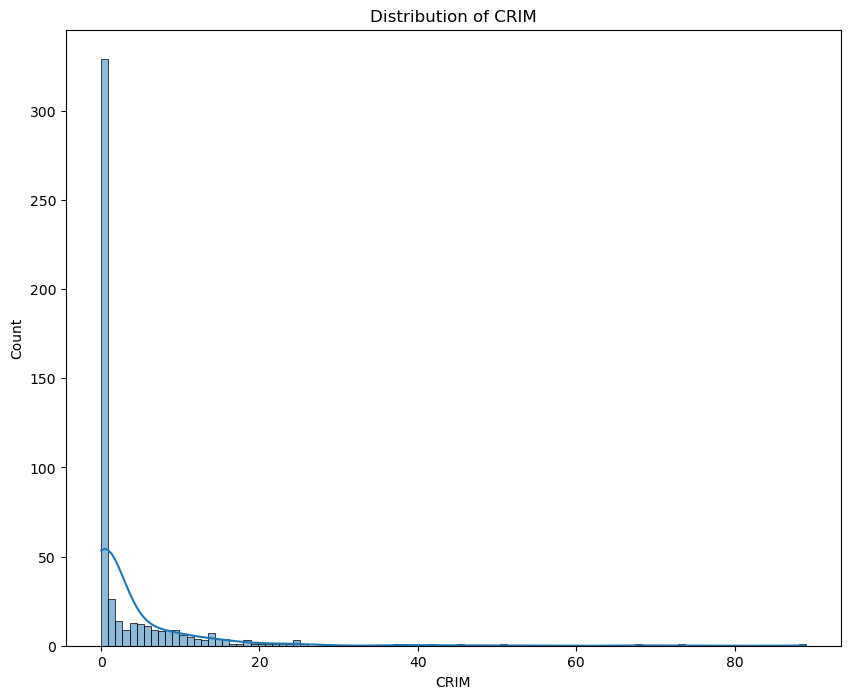

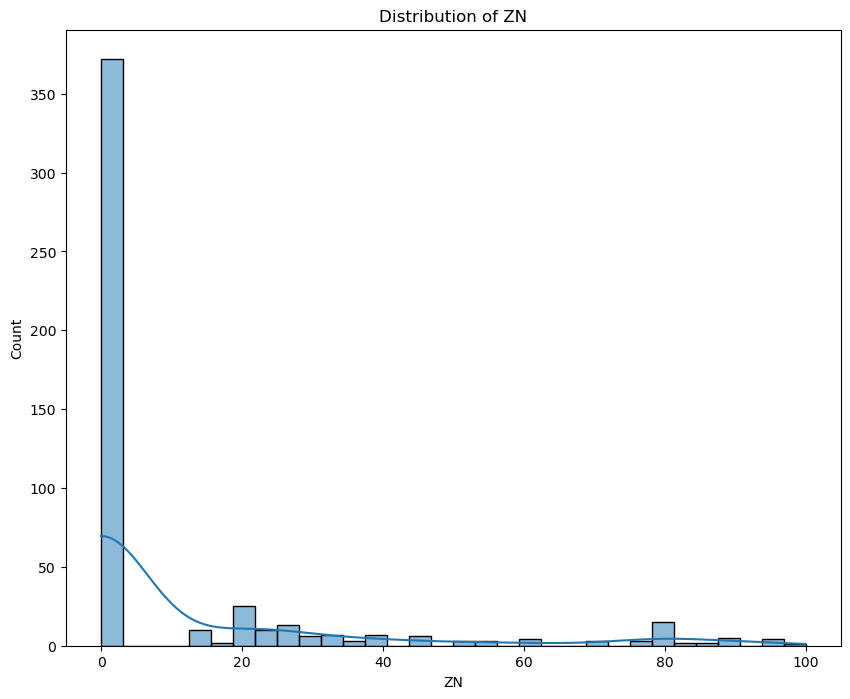

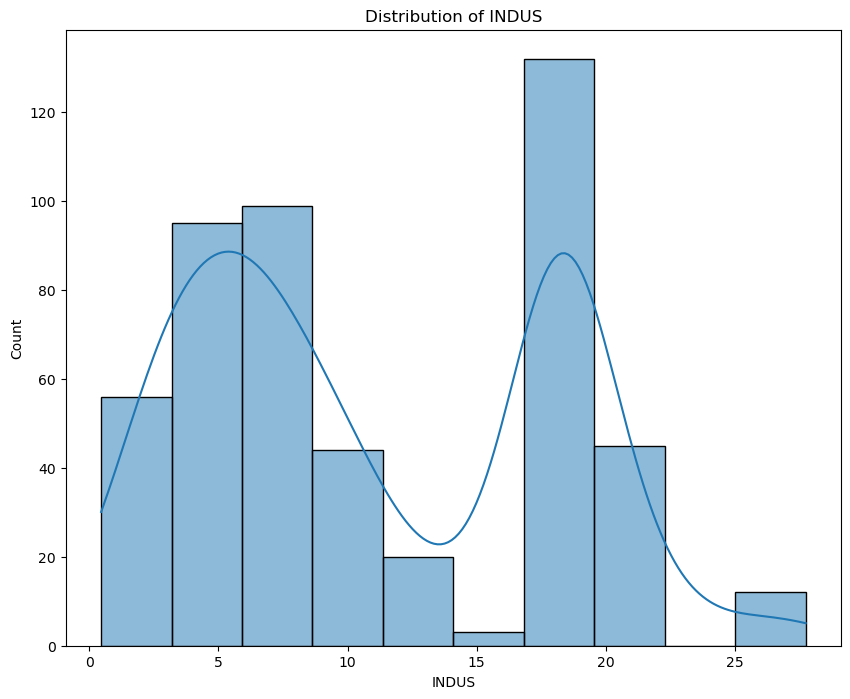

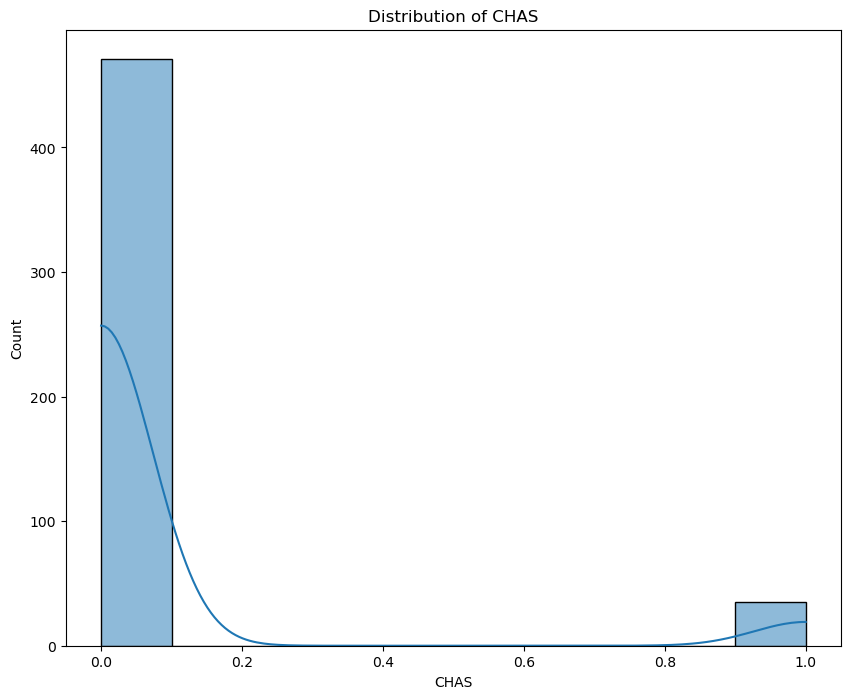

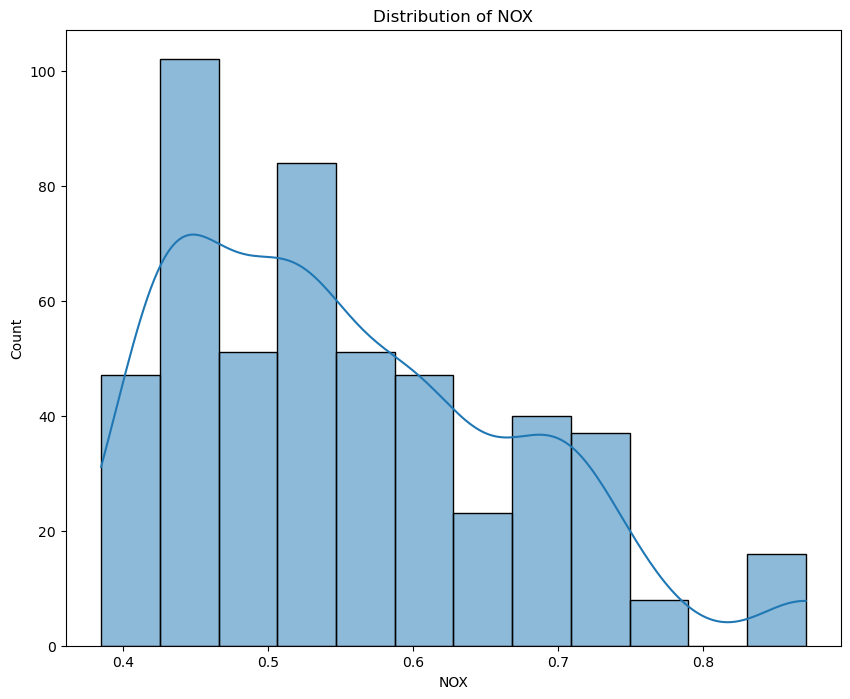

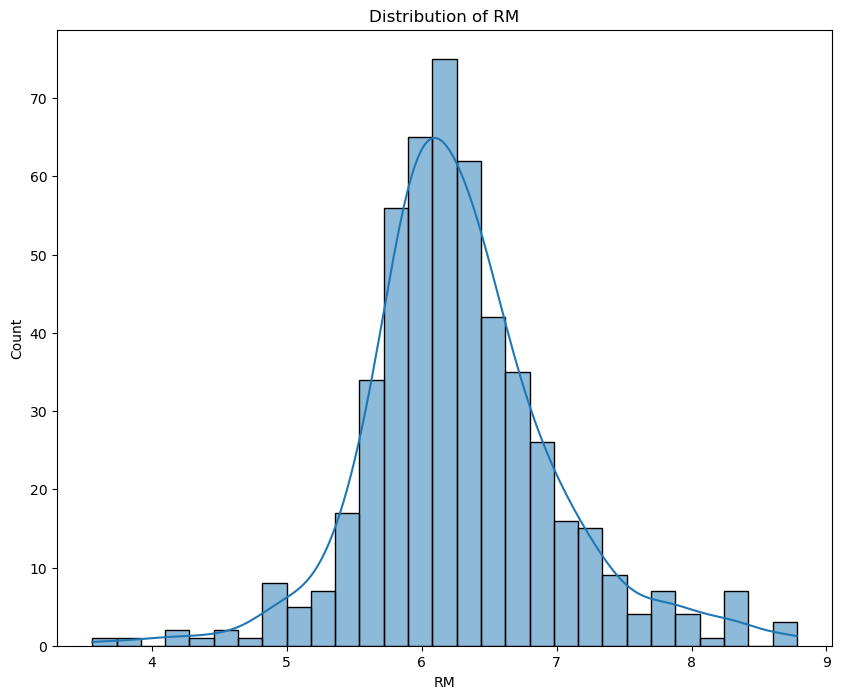

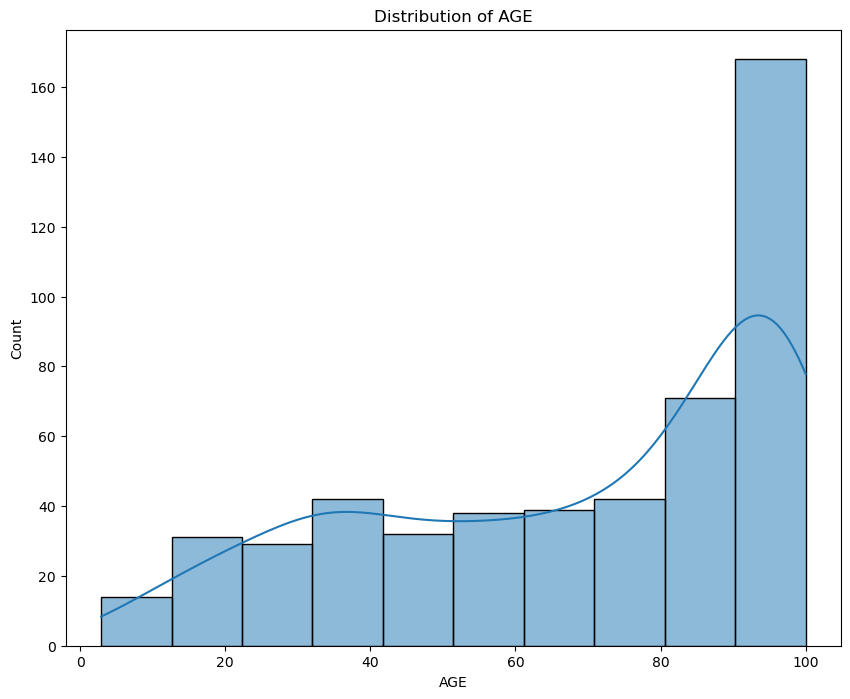

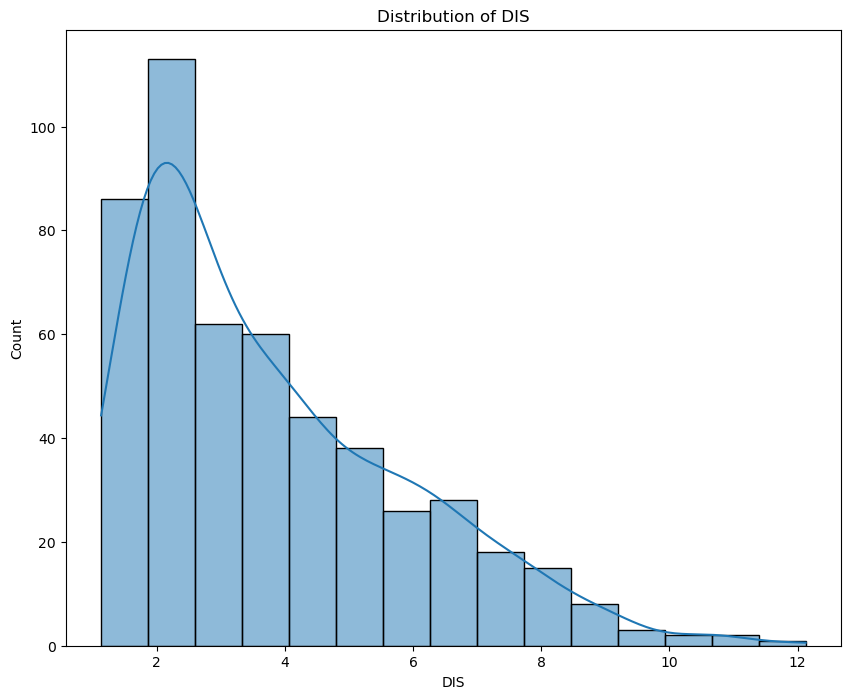

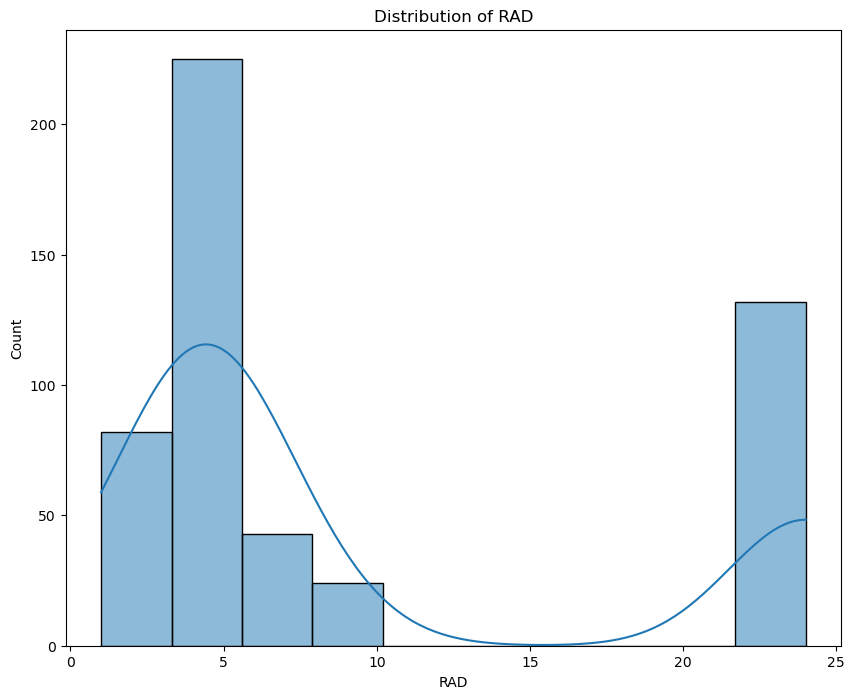

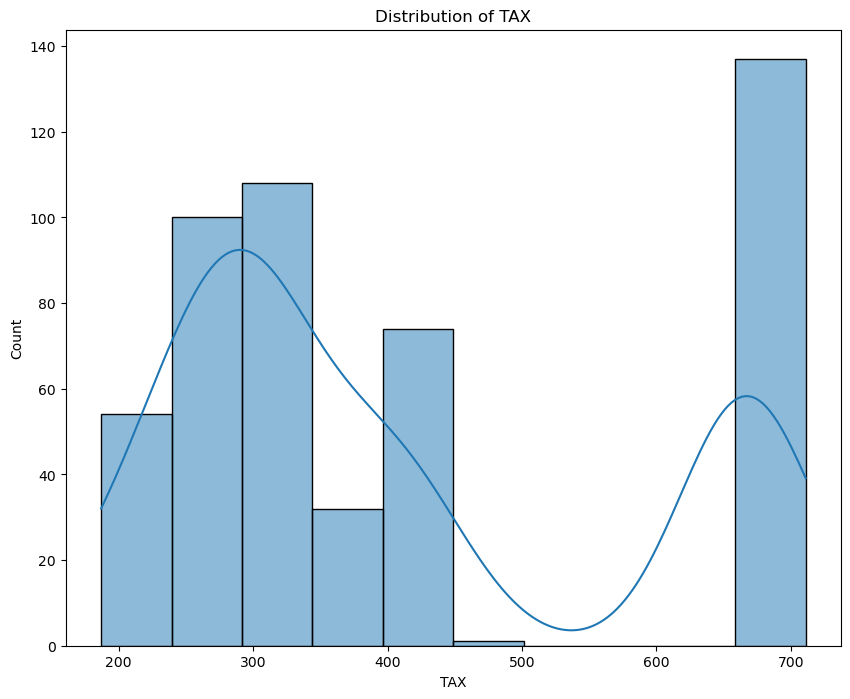

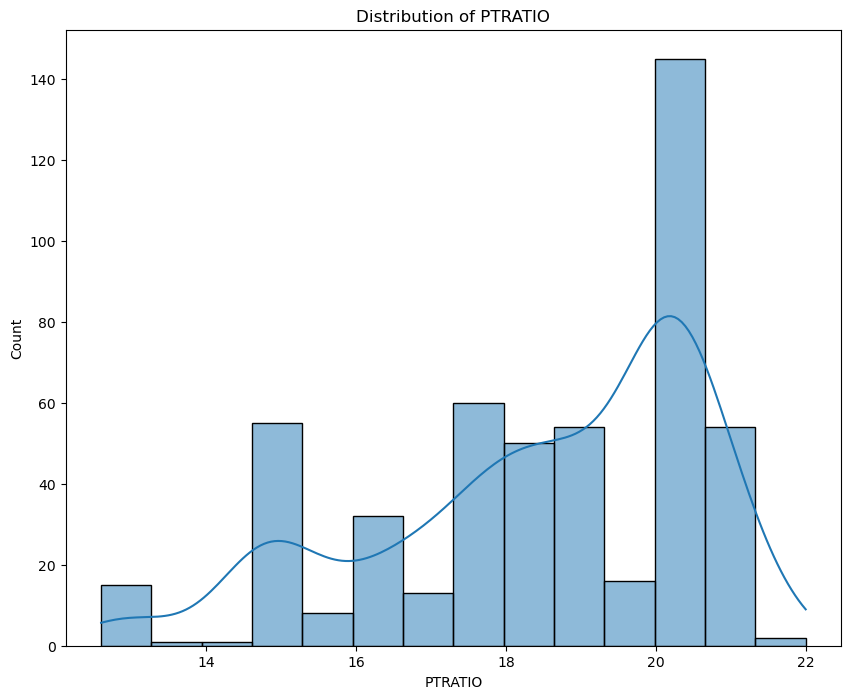

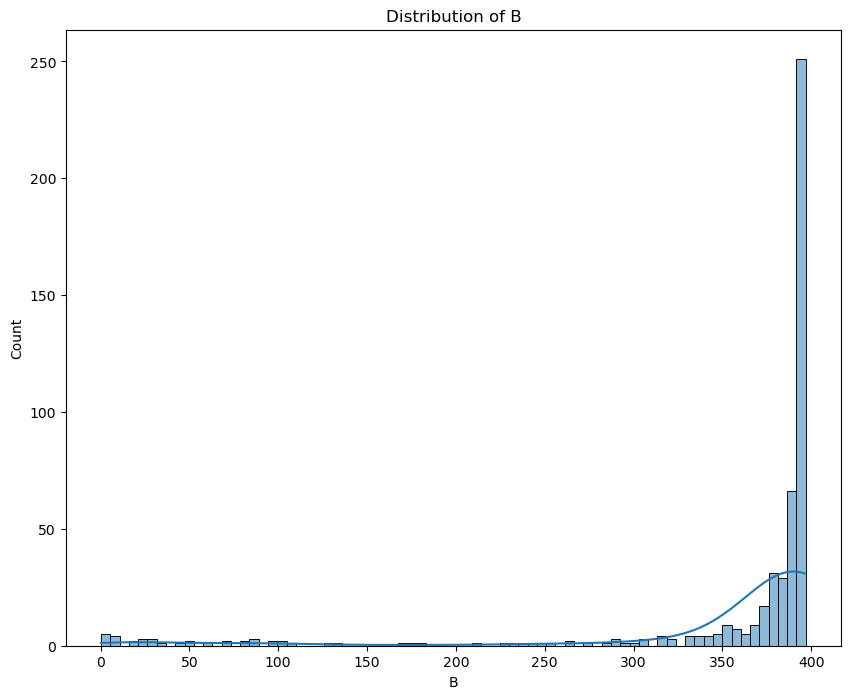

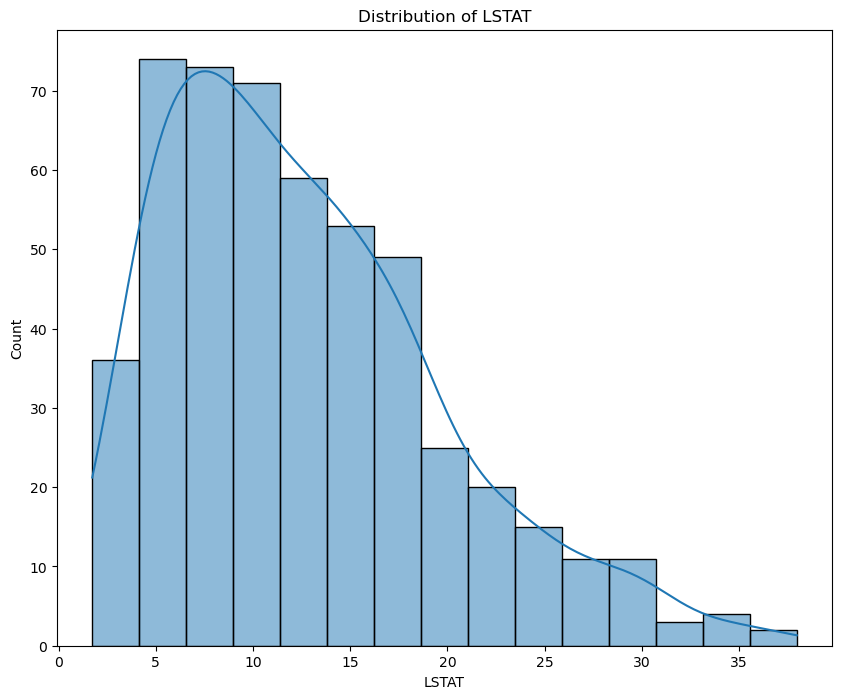

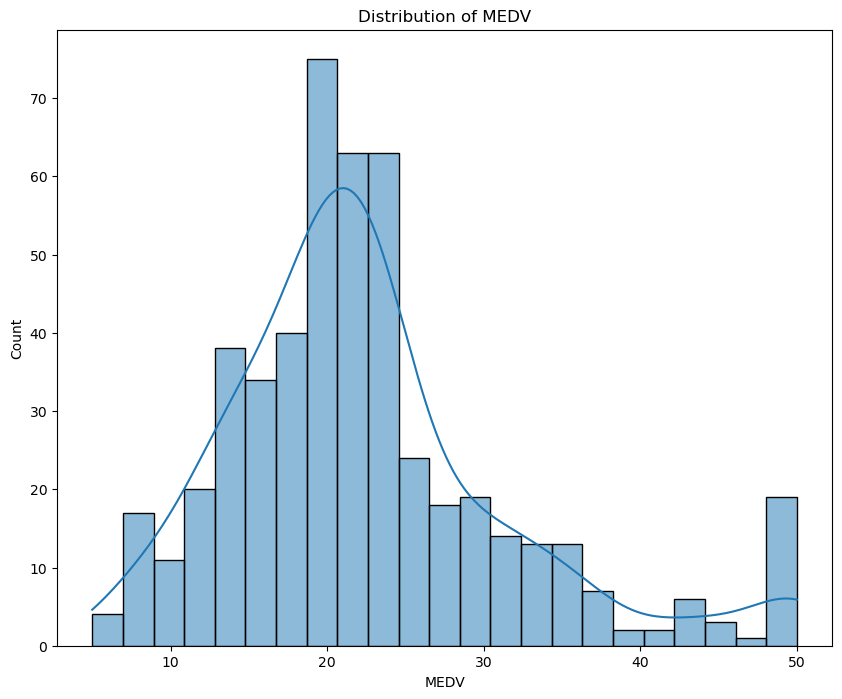

In [8]:
# View histograms for each variable
for col in df:
    plt.figure(figsize=(10,8))
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

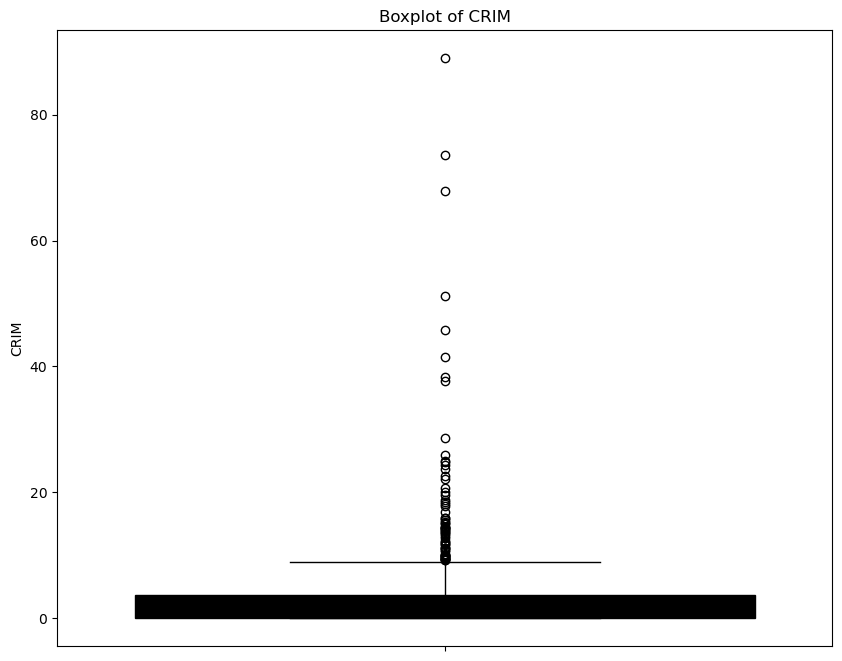

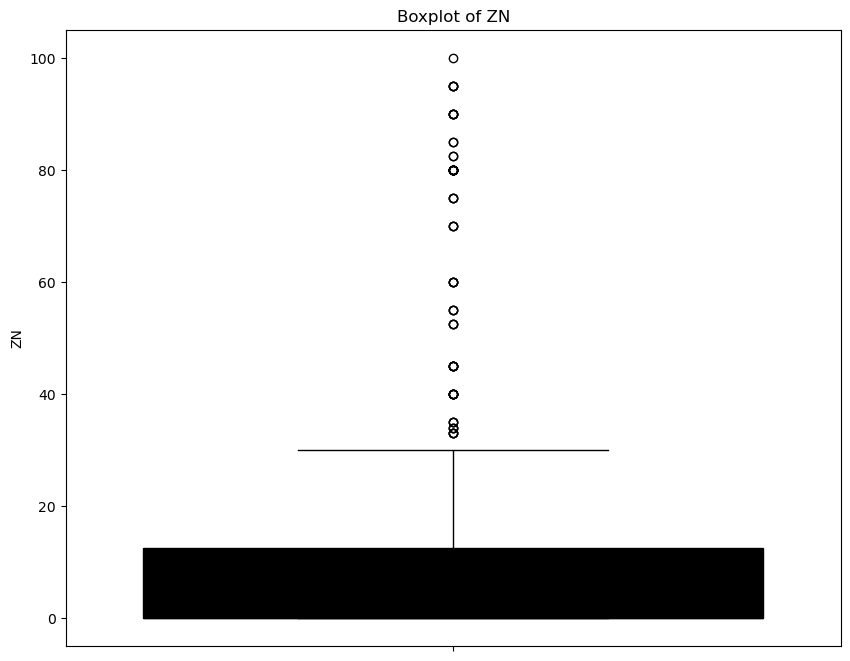

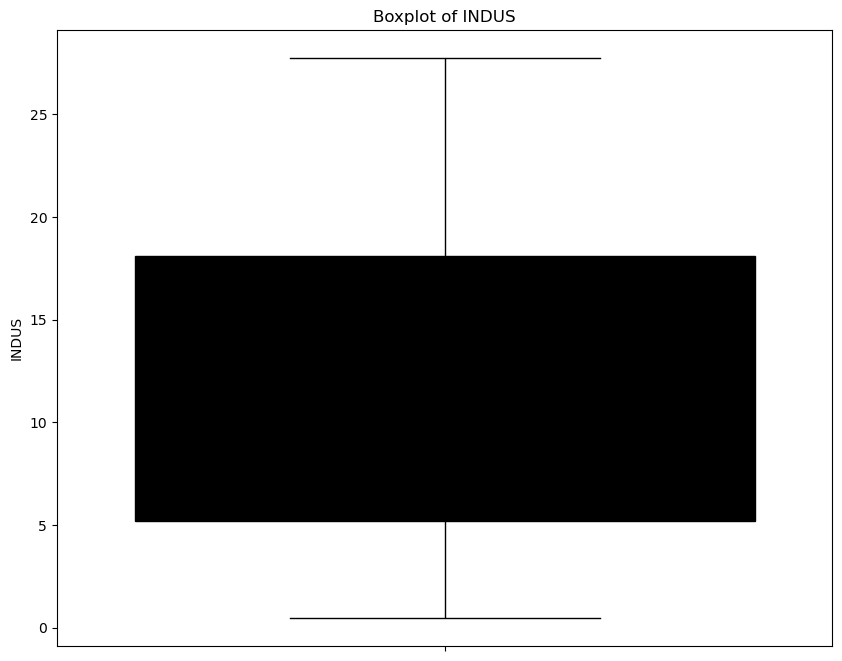

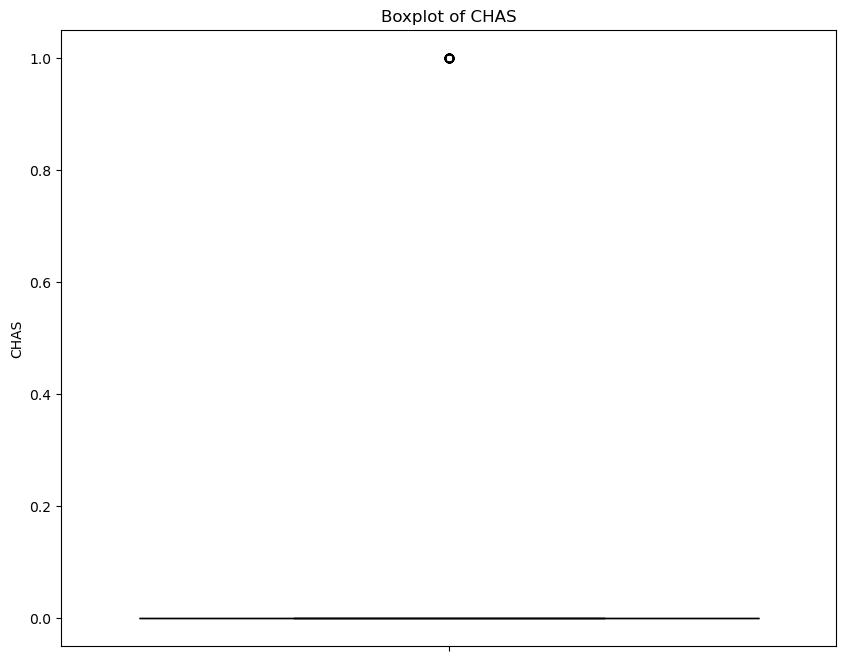

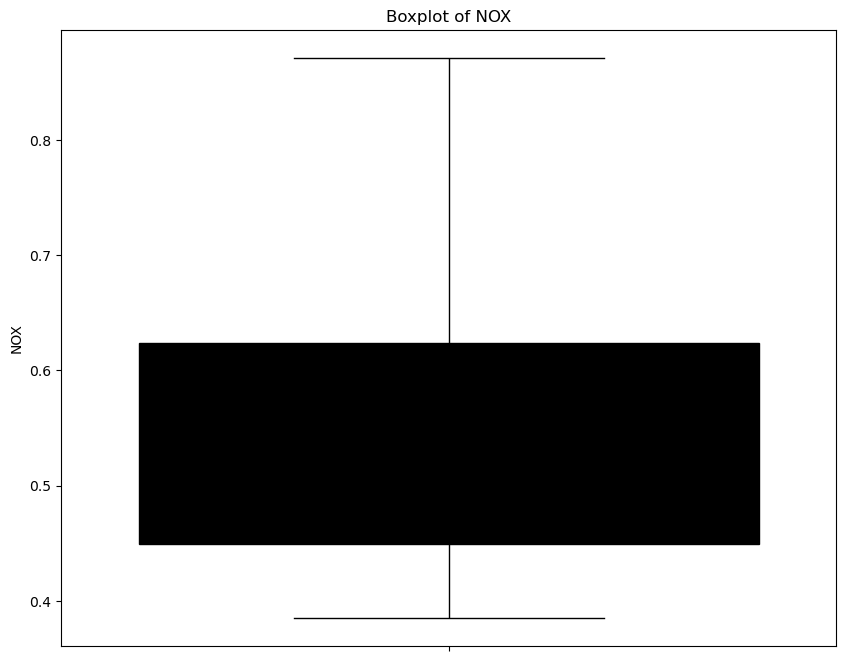

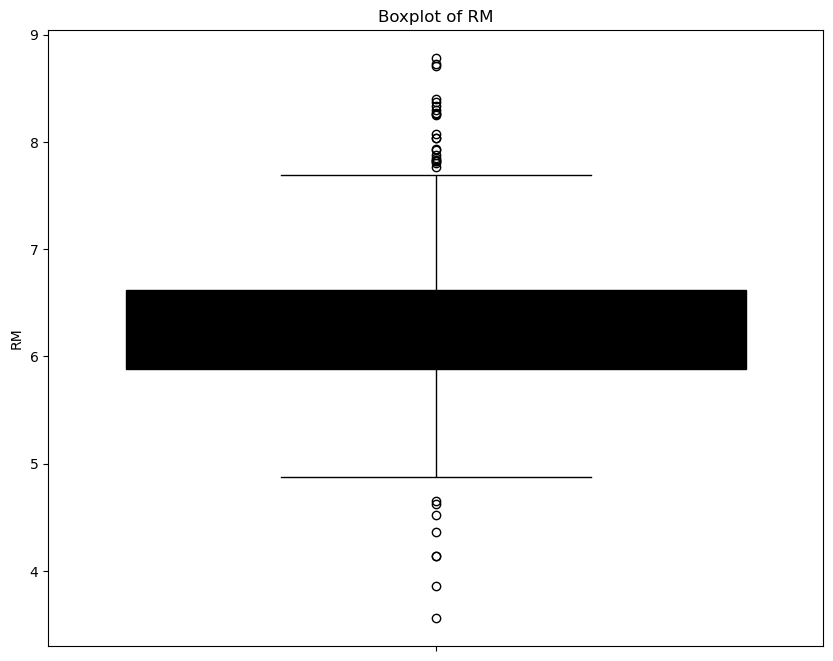

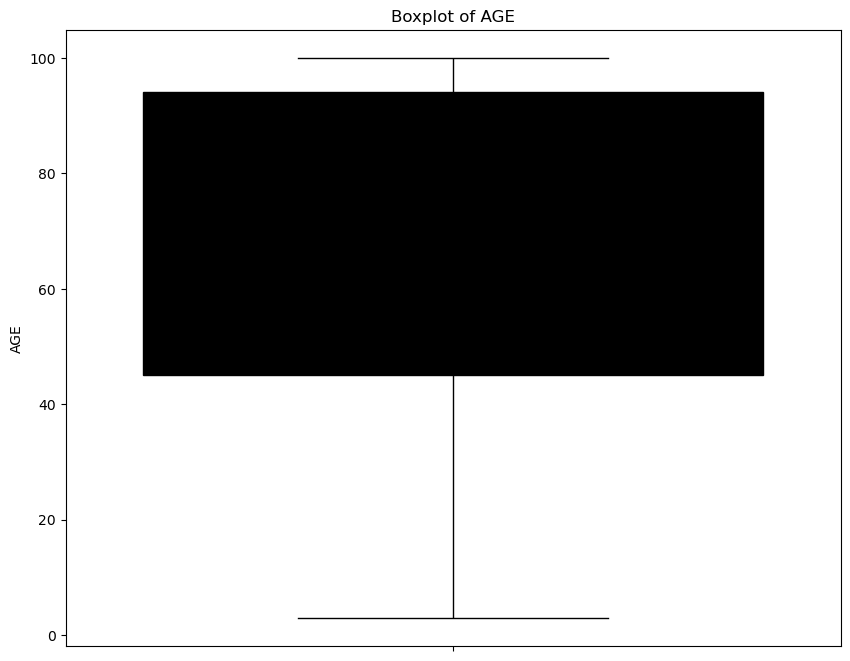

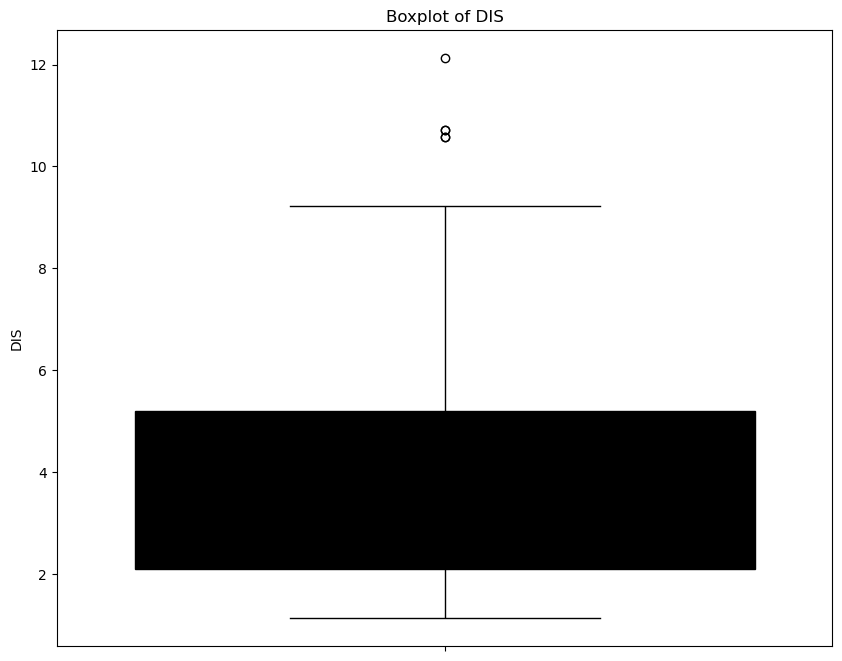

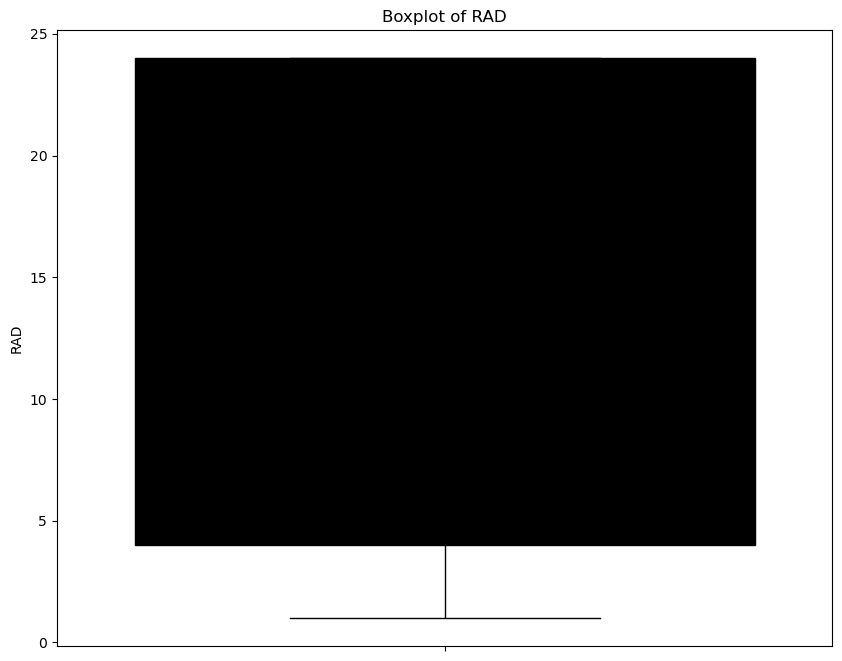

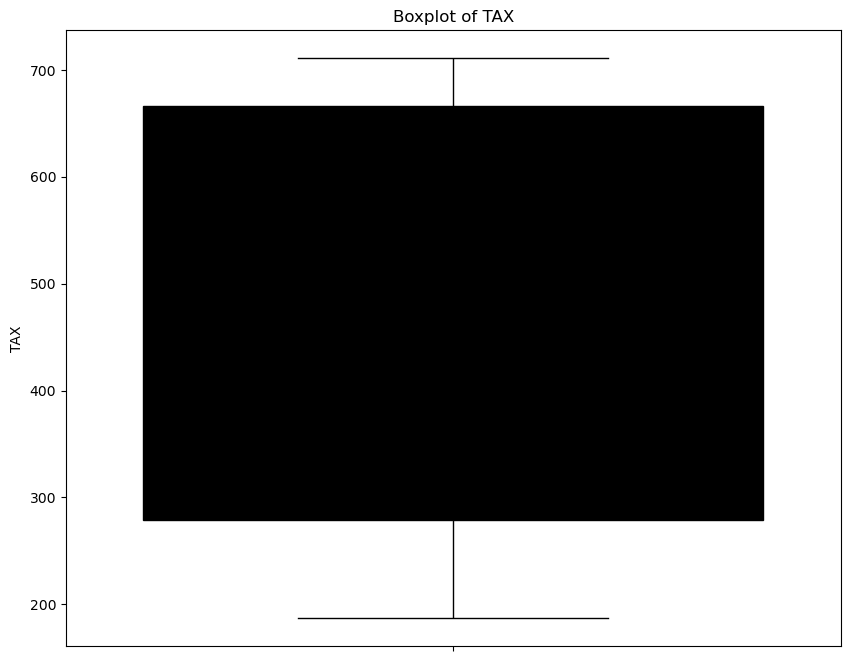

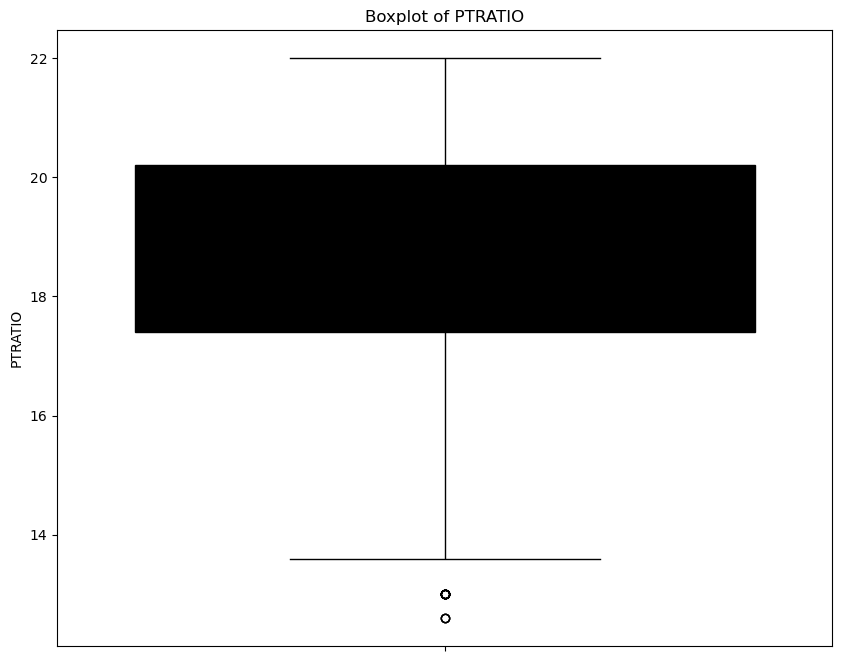

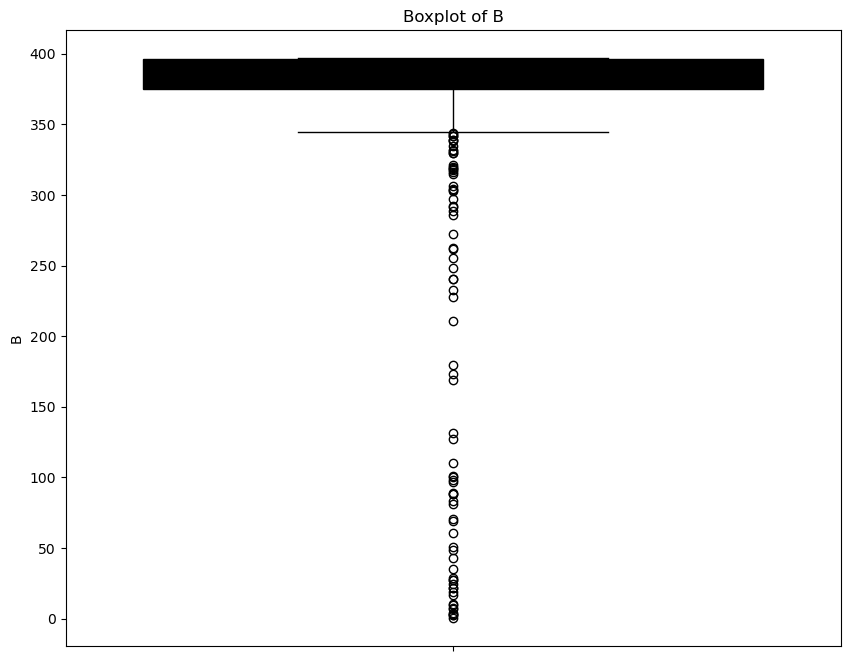

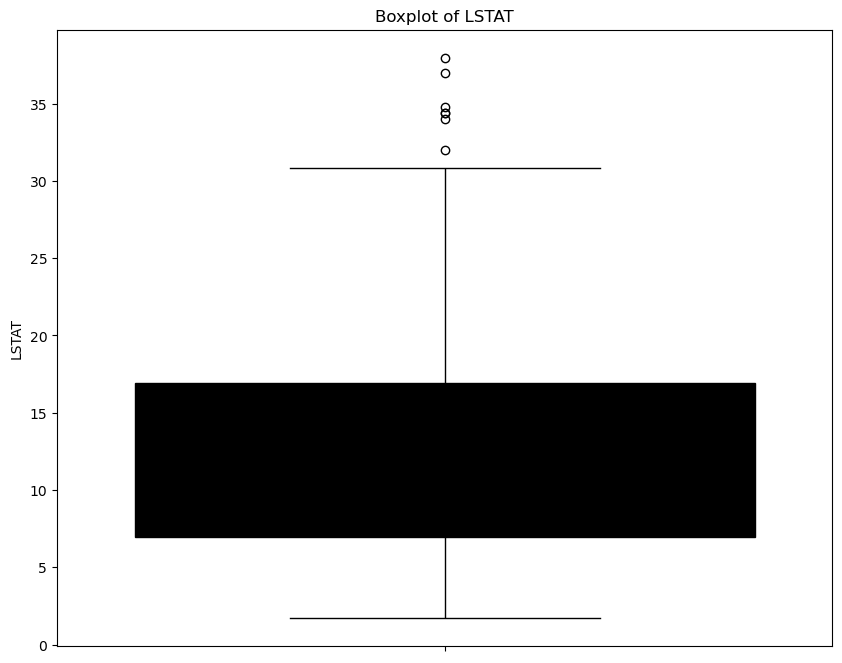

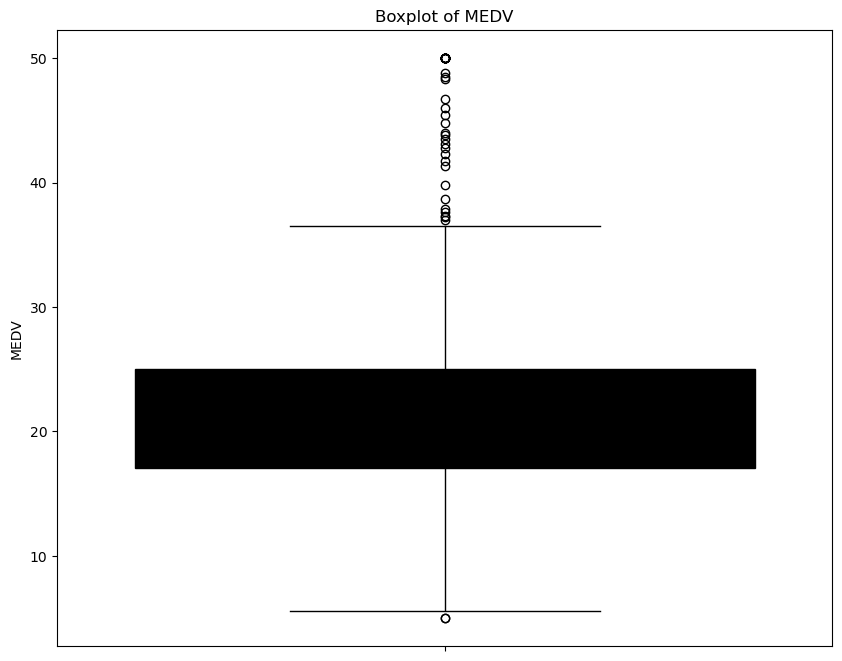

In [ ]:
# Let's visually look at boxplots to see if there are any outliers present
for col in df:
    plt.figure(figsize=(10,8))
    sns.boxplot(y=df[col], color='black')
    plt.title(f"Boxplot of {col}")
    plt.show()

# There looks to be many outliers present among each variables

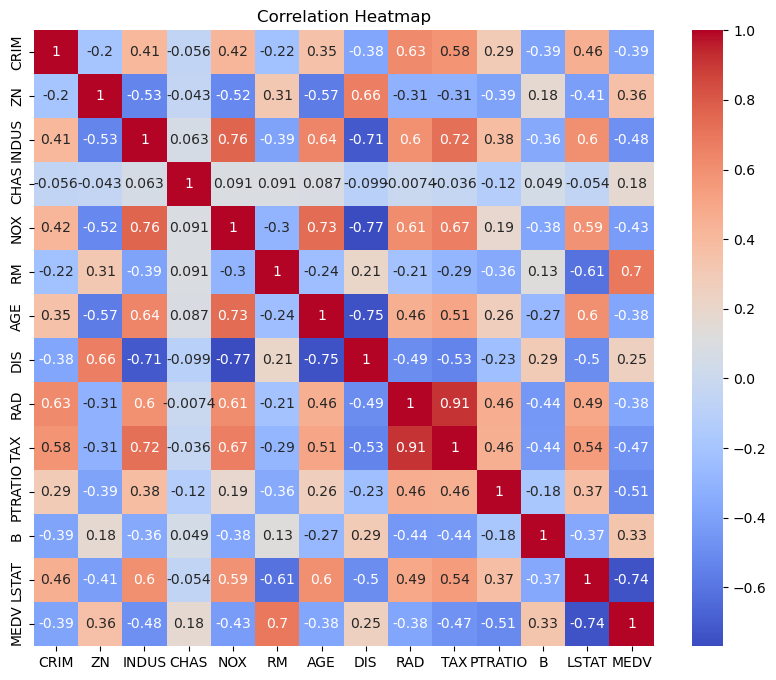

In [ ]:
# Also look at correlation heatmap
plt.figure(figsize=(10,8))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# RM is correlated with MEDV at 0.7, As RM (number of rooms per dwelling),
# increases, MEDV (median value of occupied homes)also increases

# LSAT is correlated negatively strong with MEDV at -0.74 meaning as LSAT 
# (% Lower status of population) increases, MEDV decreases


In [19]:
# Let's Predict MEDV based on the other 13 predictors(features)
np.random.seed(42)

# Define features and target
X = df.drop('MEDV', axis=1)
y = df['MEDV']

In [20]:
# Train and test split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [23]:
# Print the shape of the Training and Testing set
print(f"Training sample size: {X_train.shape}")
print(f"Testing sample size: {X_test.shape}")

Training sample size: (404, 13)
Testing sample size: (102, 13)


In [24]:
# Features are on different scales so let's standardize features
scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

In [25]:
# Let's fit Linear regression model
lr_full = LinearRegression()
lr_full.fit(X_train_scale, y_train)

LinearRegression()

In [26]:
# Let's make predictions
y_pred_train = lr_full.predict(X_train_scale)
y_pred_test = lr_full.predict(X_test_scale)

In [28]:
# Let's Evaluate performance of model on train and test (test is what we are
# focused on more)

mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

In [ ]:
print("\nModel Performance:")
print(f"Training MSE: {mse_train:.2f}, R2: {r2_train:.2f}")
print(f"Testing MSE: {mse_test:.2f}, R2: {r2_test:.2f}")

# For Training Set R2 is 0.75 which means that 75% of the variation in
# MEDV is explained by the features

# For Testing Set R2 is 0.67 which means that 67% of the variation in MEDV
# is explained by the features. This is okay but can be better


Model Performance:
Training MSE: 21.64, R2: 0.75
Testing MSE: 24.29, R2: 0.67


In [ ]:
# Let's look at the coefficient for each predictor to see how they contribute to MEDV
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lr_full.coef_
})

print("\nRegression Coefficients:\n", coef_df)
print("Intercept:", lr_full.intercept_)

# for example RM has coefficient of 3.14. This means that for each additional room
#, the predicted MEDV increases by $3.145 thousand (3,145) on average, holding all
# other variables constant


Regression Coefficients:
     Feature  Coefficient
0      CRIM    -1.002135
1        ZN     0.696269
2     INDUS     0.278065
3      CHAS     0.718738
4       NOX    -2.022319
5        RM     3.145240
6       AGE    -0.176048
7       DIS    -3.081908
8       RAD     2.251407
9       TAX    -1.767014
10  PTRATIO    -2.037752
11        B     1.129568
12    LSTAT    -3.611658
Intercept: 22.796534653465343


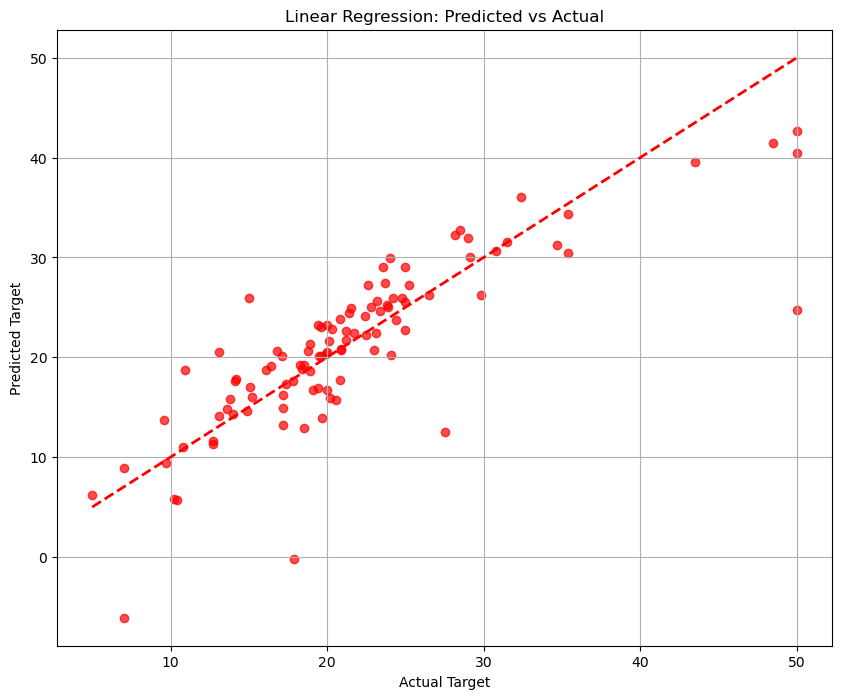

In [31]:
# Visualize Actual vs Predicted
plt.figure(figsize=(10,8))
plt.scatter(y_test, y_pred_test, alpha=0.7, color='red')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Target")
plt.ylabel("Predicted Target")
plt.title("Linear Regression: Predicted vs Actual")
plt.grid(True)
plt.show()